In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
!python -m pip install statsmodels 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 3.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.8 MB 3.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 3.7 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.8 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 3.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 3.7 MB/s eta 0:00:01
   --------------

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip3 install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.5 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 3.4 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.4 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.1 MB 3.4 MB/s eta 0:00:01
   --

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df=pd.read_csv('gold_monthly_csv.csv')
df.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [3]:
df.shape

(847, 2)

In [4]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [5]:
df.loc[:,'Date']

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
842    2020-03
843    2020-04
844    2020-05
845    2020-06
846    2020-07
Name: Date, Length: 847, dtype: object

In [6]:
date=pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [7]:
df['Month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('Month')

In [8]:
df.head(10)

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73
1950-06-30,34.73
1950-07-31,34.73
1950-08-31,34.73
1950-09-30,34.73


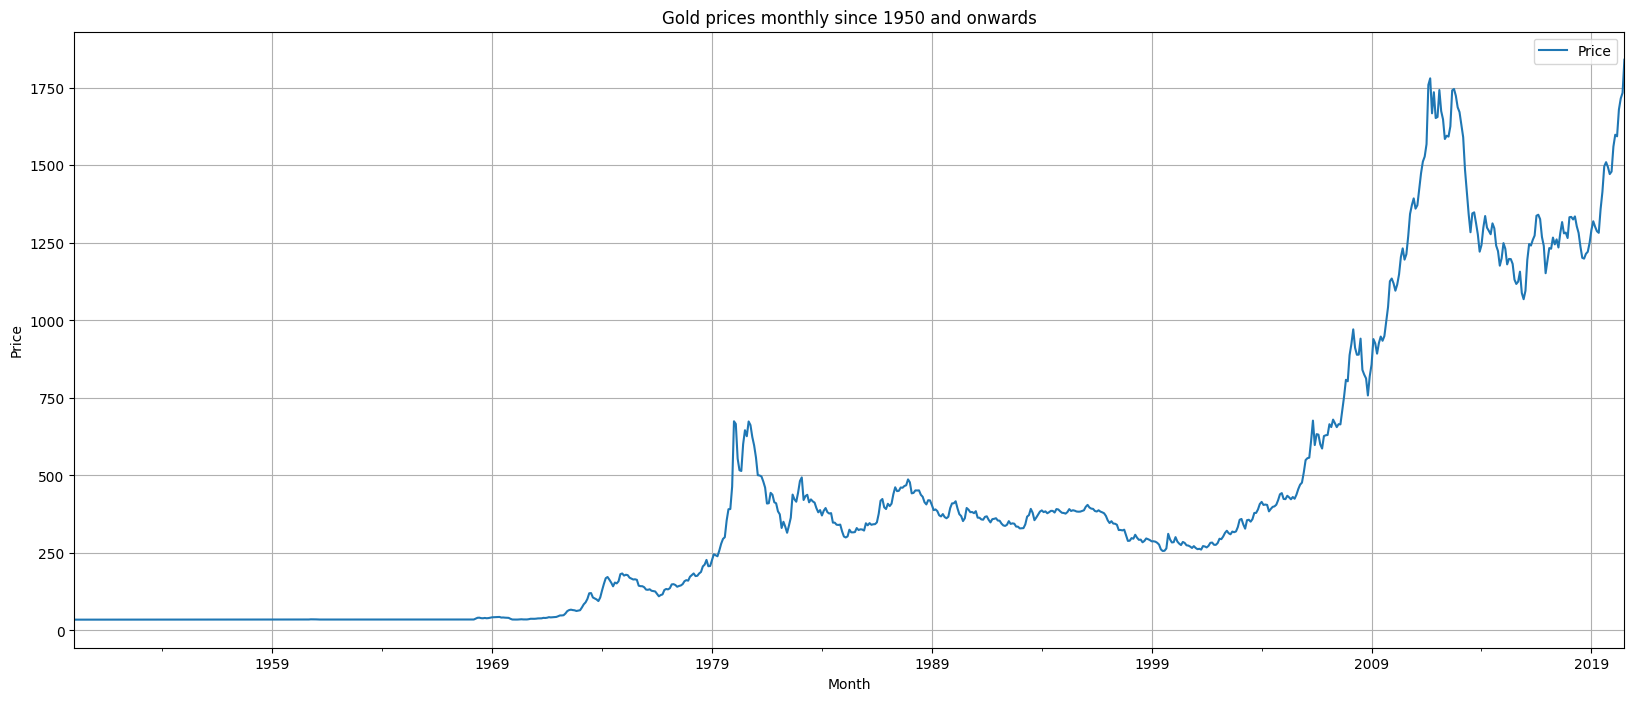

In [10]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()
plt.show()


In [14]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


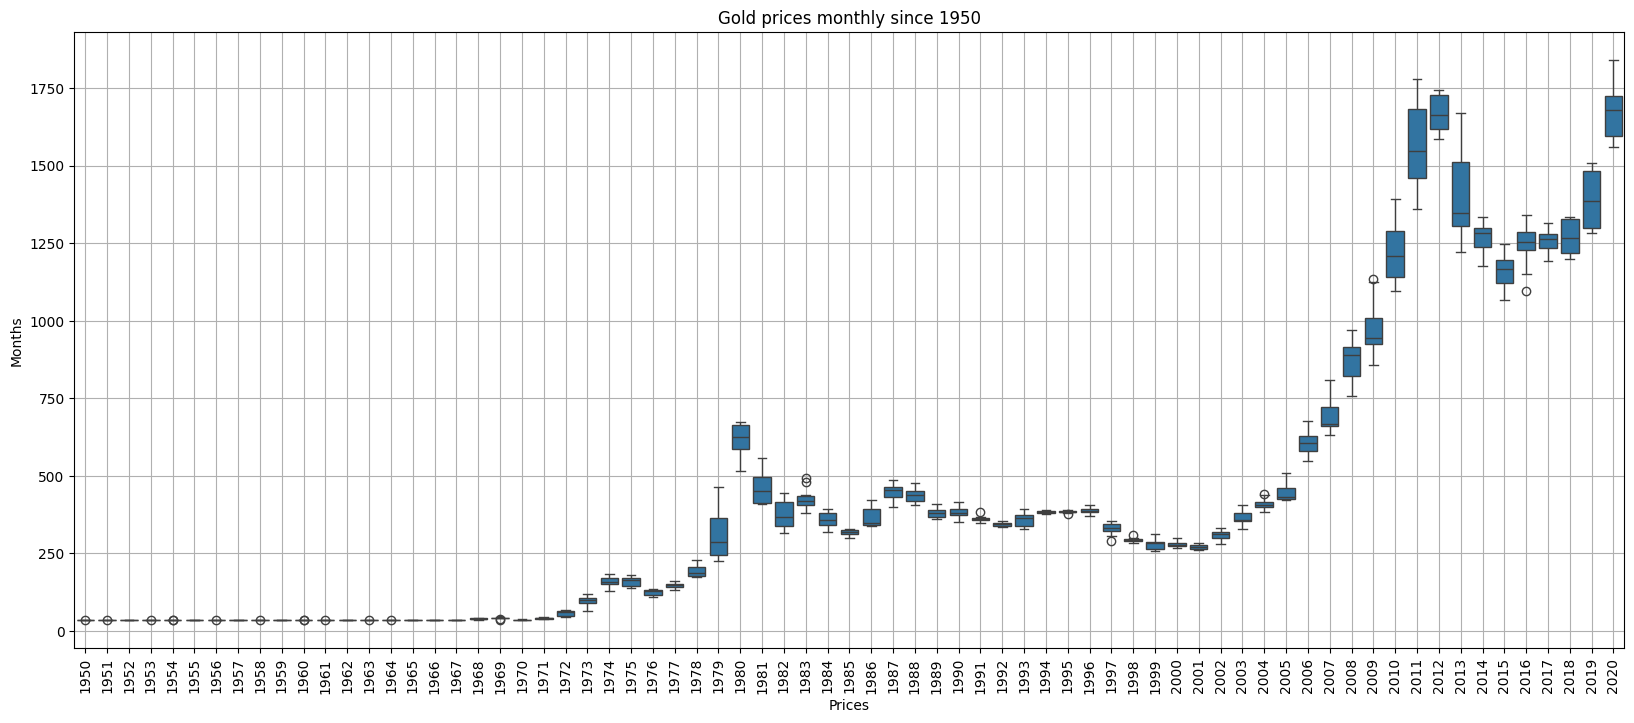

In [16]:
_,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title("Gold prices monthly since 1950")
plt.xlabel("Prices")
plt.ylabel("Months")
plt.xticks(rotation=90)
plt.grid()


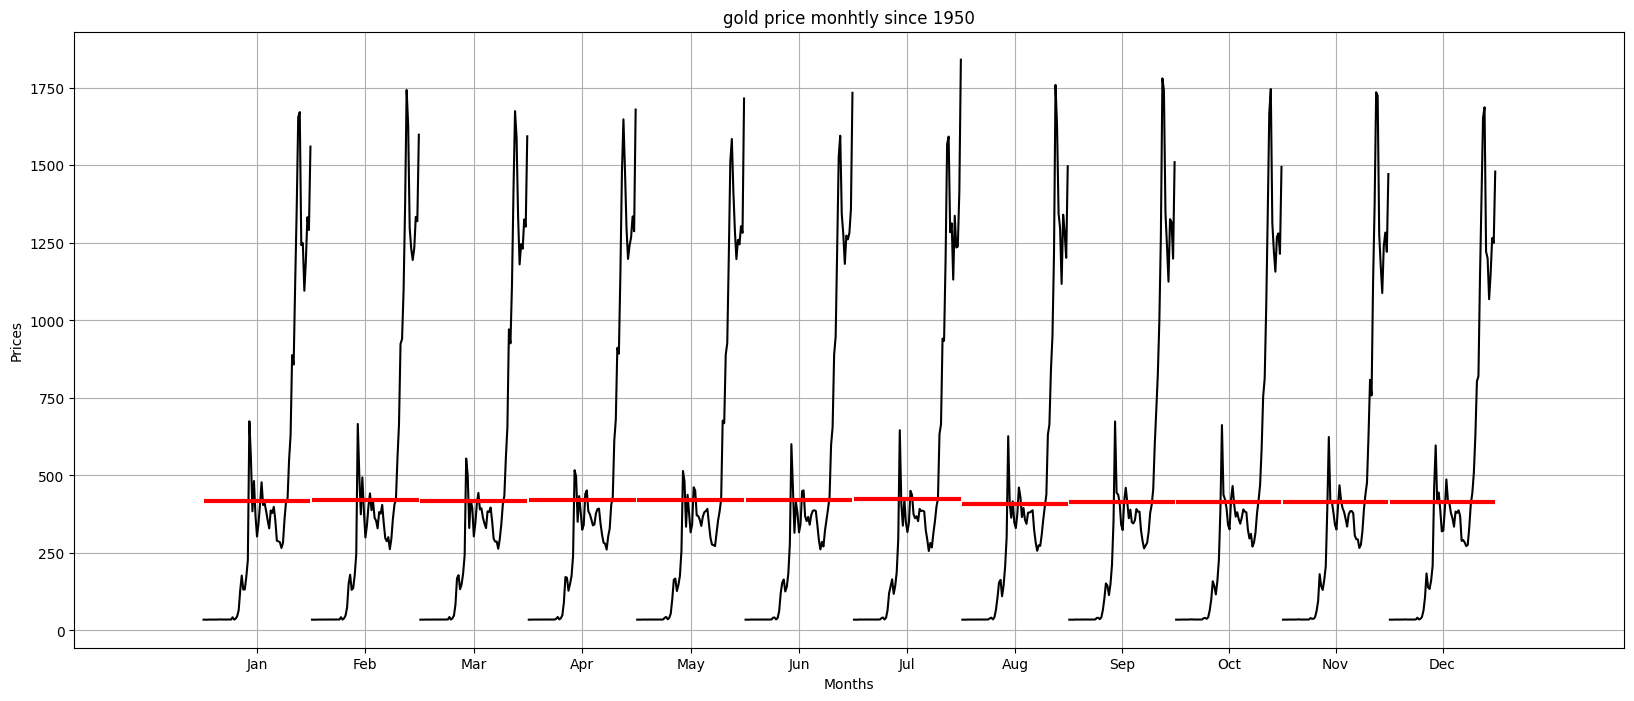

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax=plt.subplots(figsize=(20,8))
month_plot(df,ylabel='Gold Price',ax=ax)
plt.title('gold price monhtly since 1950')
plt.xlabel('Months')
plt.ylabel('Prices')
plt.grid()

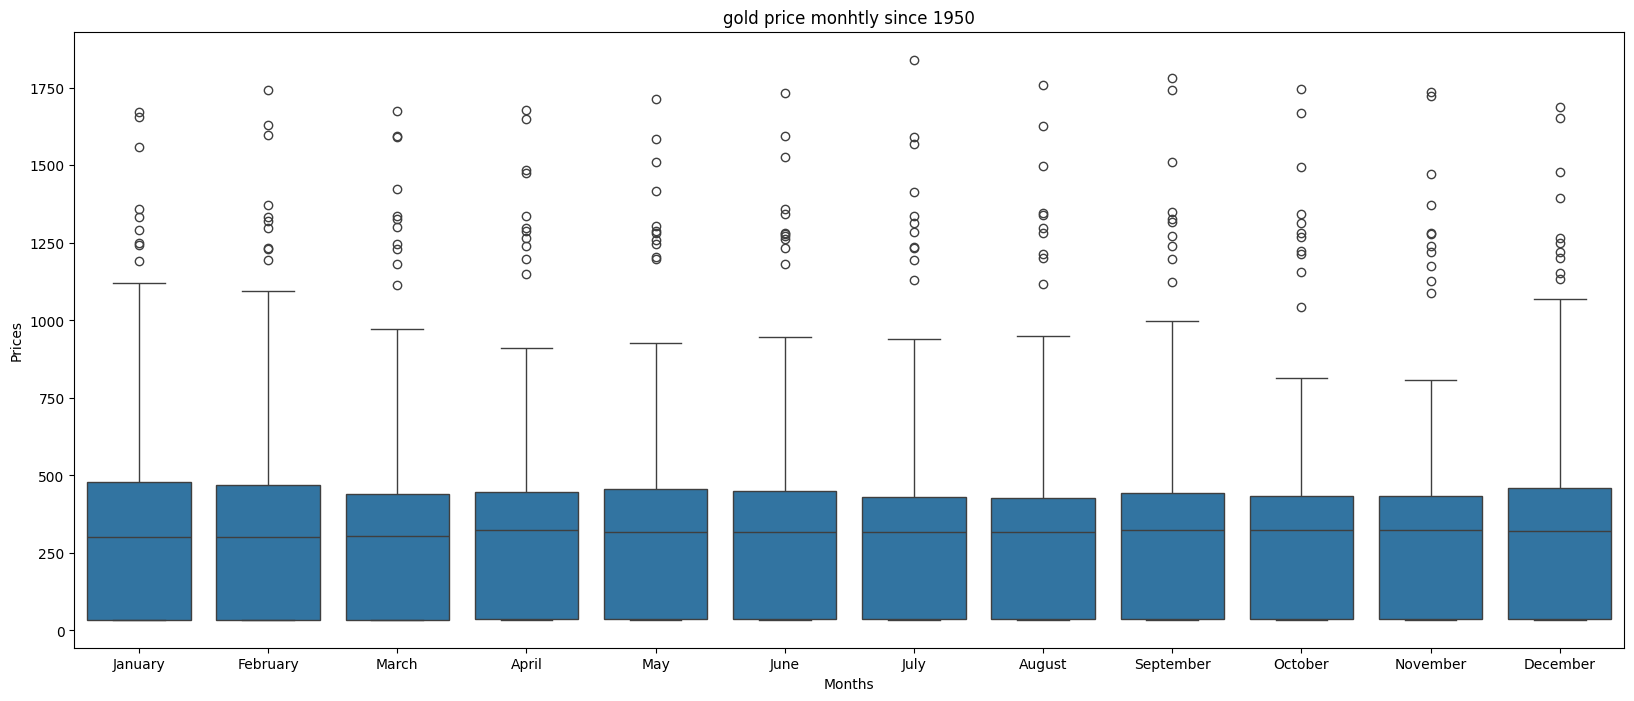

In [21]:
_,ax=plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title('gold price monhtly since 1950')
plt.xlabel('Months')
plt.ylabel('Prices')
plt.show()
#plt.grid()

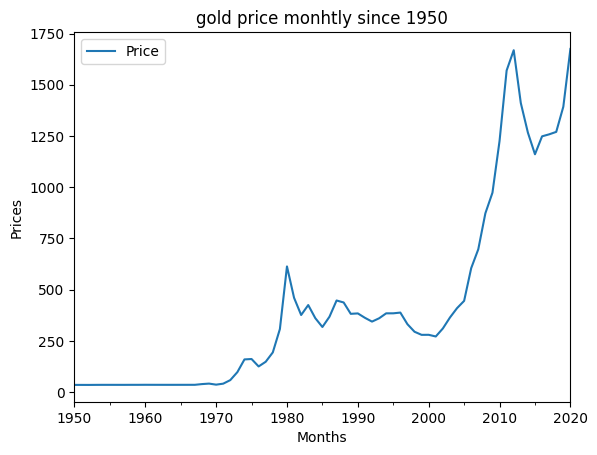

In [22]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot()
plt.title('gold price monhtly since 1950')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.show()

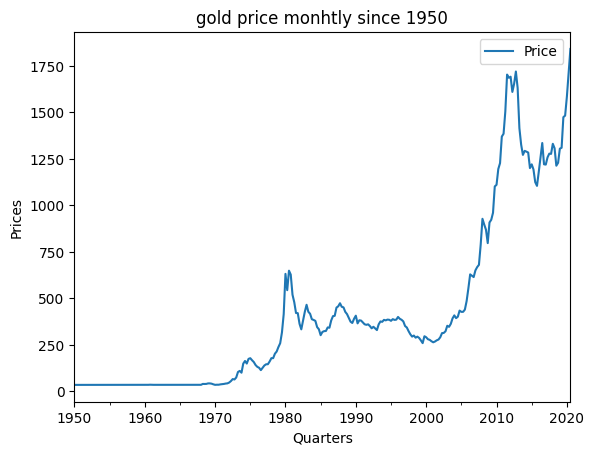

In [23]:
df_quartly_sum=df.resample('Q').mean()
df_quartly_sum.plot()
plt.title('gold price monhtly since 1950')
plt.xlabel('Quarters')
plt.ylabel('Prices')
plt.show()

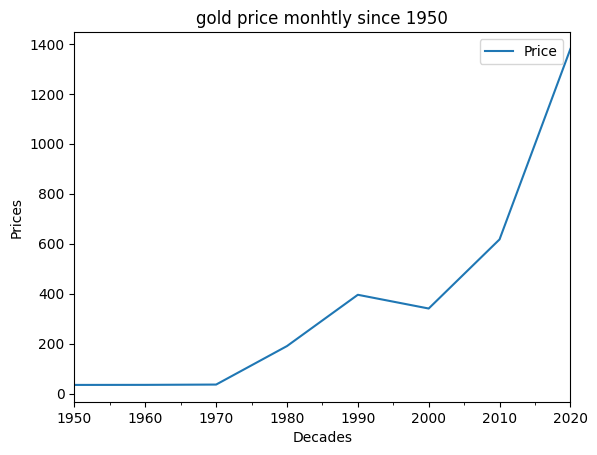

In [24]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('gold price monhtly since 1950')
plt.xlabel('Decades')
plt.ylabel('Prices')
plt.show()